# Exploration of WWatch3 Results

Basic exploration and visualization of wwatch3 fields and points results files from 
Salish Sea Nowcast system SoG-waves run.

In [20]:
import cmocean
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
%matplotlib inline

## Fields File

From 2nd forecast run in a test run series initiated with 
quiescent initial wave state on 20-Jan-2017
forced with hourly HRDPS winds and Salish Sea NEMO nowcatst currents.

In [12]:
wwf = xr.open_dataset('SoG_ww3_fields_20170121_20170123.nc')
wwf

<xarray.Dataset>
Dimensions:    (latitude: 661, longitude: 572, time: 120)
Coordinates:
  * longitude  (longitude) float32 234.0 234.007 234.014 234.021 234.028 ...
  * latitude   (latitude) float32 48.0 48.0045 48.009 48.0135 48.018 48.0225 ...
  * time       (time) datetime64[ns] 2017-01-21 2017-01-21T00:29:59.971200 ...
Data variables:
    MAPSTA     (latitude, longitude) int16 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 ...
    ucur       (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    vcur       (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    uwnd       (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    vwnd       (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    hs         (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    lm         (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    t02        (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    fp         (time, lat

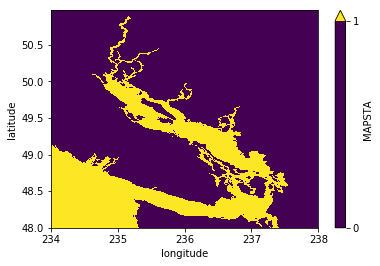

In [13]:
# Whole wwatch3 domain land mask
wwf.MAPSTA.plot(levels=[0, 1])

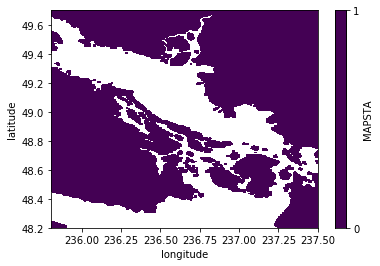

In [14]:
# zoom to southern SoG and northen JdF
wwf.MAPSTA.sel(longitude=slice(235.8, 237.5), latitude=slice(48.2, 49.7)).plot(levels=[0, 1])

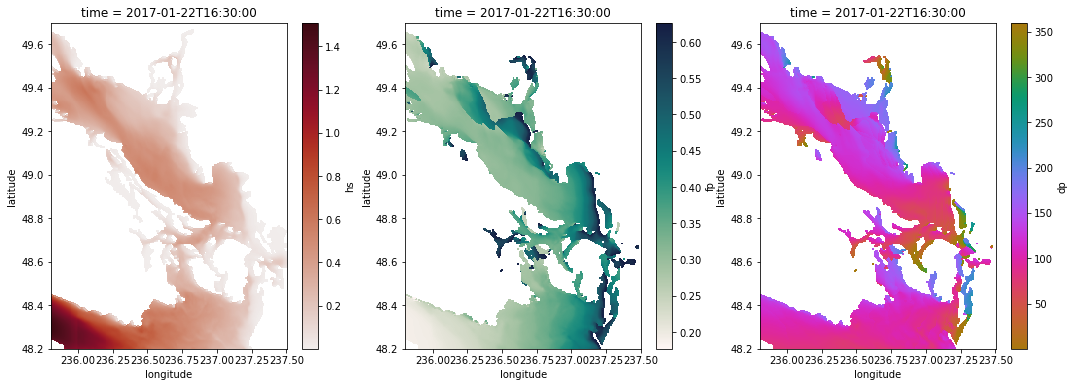

In [6]:
time='2017-01-22 16:30:00'
longitude=slice(235.8, 237.5)
latitude=slice(48.2, 49.7)

# Significant wave height, peak frequency, and peak wave direction
# at high water storm surge warning time at Victoria on 22-Jan-2017
# https://salishsea.eos.ubc.ca/nemo/results/forecast/publish/22jan17
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
wwf.hs.sel(time=time, longitude=longitude, latitude=latitude).plot(ax=axs[0], cmap=cmocean.cm.amp)
wwf.fp.sel(time=time, longitude=longitude, latitude=latitude).plot(ax=axs[1], cmap=cmocean.cm.tempo)
wwf.dp.sel(time=time, longitude=longitude, latitude=latitude).plot(ax=axs[2], cmap=cmocean.cm.phase)

https://salishsea.eos.ubc.ca/nemo/results/forecast/publish/22jan17

## Points File

From 2nd forecast run in a test run series initiated with 
quiescent initial wave state on 20-Jan-2017
forced with hourly HRDPS winds and Salish Sea NEMO nowcatst currents.

In [51]:
wwp = xr.open_dataset('SoG_ww3_points_20170121_20170123.nc')
wwp

<xarray.Dataset>
Dimensions:       (station: 3, string16: 16, time: 360)
Coordinates:
  * time          (time) datetime64[ns] 2017-01-21 ...
  * station       (station) float64 1.0 2.0 3.0
  * string16      (string16) float64 nan nan nan nan nan nan nan nan nan nan ...
Data variables:
    station_name  (station, string16) |S1 b'C' b'4' b'6' b'1' b'3' b'4' b'P' ...
    longitude     (time, station) float64 236.5 236.3 235.0 236.5 236.3 ...
    latitude      (time, station) float64 48.66 49.34 49.91 48.66 49.34 ...
    wnd           (time, station) float64 2.854 2.992 3.84 3.253 2.805 3.634 ...
    wnddir        (time, station) float64 11.83 298.7 271.6 17.32 295.2 ...
    hs            (time, station) float64 0.0005753 0.1161 0.01807 0.0008742 ...
    tp            (time, station) float64 0.0 3.169 0.0 0.0 3.102 0.0 0.0 ...
Attributes:
    product_name: SoG_ww3_points_20170121_tab.nc
    area: SoG_BCgrid_00500m
    data_type: OCO spectra 2D
    format_version: 1.1
    southernmost_latit

In [72]:
# Reconstruct the station name of the 2nd station (Halibut Bank buoy)
# from the byte-array it is stored in the file as
''.join([c.decode() for c in wwp.station_name.values[1]])

'C46146HalB'

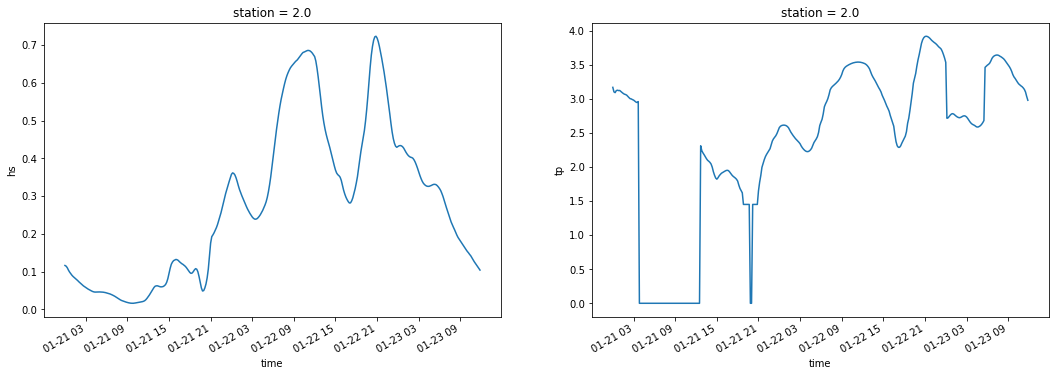

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# Significant wave height [m] and peak frequency [s] time series
# at 10 minute intervals over 60 hr forecast period
wwp.hs[:, 1].plot(ax=axs[0])
wwp.tp[:, 1].plot(ax=axs[1])